In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.ticker as ticker

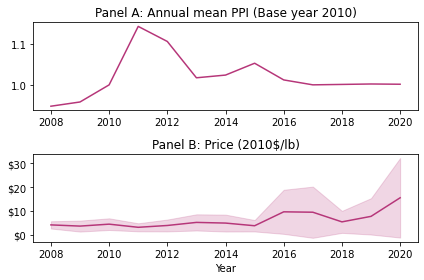

In [4]:
ppi = pd.read_csv("../R project/Out/ppisum.csv")
ppi["PPI_mean"]=ppi["PPI_mean"]/1.8975
ppi.columns = ["Year","Annual mean PPI (Base year 2010)"]
ppi=ppi[ppi["Year"]>2007]
data = pd.read_csv("../R project/Out/data_traore.csv")
data["adj_high_bid"]=data["adj_high_bid"]/1.8975

fig,axs=plt.subplots(nrows=2)


g1=sns.lineplot(data=ppi,x="Year",y="Annual mean PPI (Base year 2010)",color="#B63679FF",ax=axs[0])
g2=sns.lineplot(data=data.rename({"adj_high_bid":"Price (2010$/lb)","year":"Year"},axis=1),x="Year",y="Price (2010$/lb)",color="#B63679FF",ci="sd",ax=axs[1])
g1.set(ylabel=None,xlabel=None)
g1.set(title="Panel A: Annual mean PPI (Base year 2010)")
g2.set(ylabel=None)
g2.set(title="Panel B: Price (2010$/lb)")
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: "$"+ "{}".format(int(x))))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.savefig("PPI_line.png",dpi=300)

In [11]:
data[data["adj_high_bid"]>25]["rank"].value_counts()

1b    22
1a    22
2b     4
2a     4
1      3
6      1
1A     1
1B     1
3b     1
4      1
12     1
Name: rank, dtype: int64

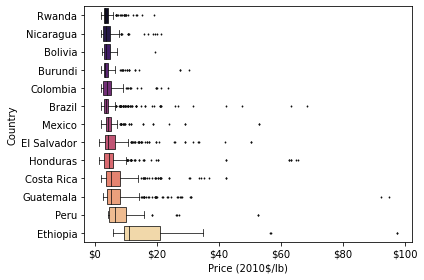

In [117]:
order = data.groupby("country").mean().sort_values(by="adj_high_bid",ascending=True).index
fig = plt.figure()
ax=plt.gca()
sns.boxplot(data=data.rename({"country":"Country","adj_high_bid":"Price (2010$/lb)"},axis=1),ax=ax,y="Country",x="Price (2010$/lb)",palette="magma",linewidth=0.75,fliersize=1,order=order)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: "$"+"{}".format(int(x))))
plt.savefig("Countries.png",dpi=300)

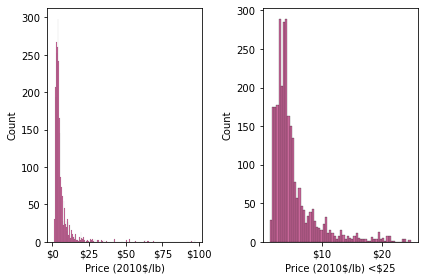

In [132]:
fig,axs=plt.subplots(ncols=2)
sns.histplot(data.rename({"adj_high_bid":"Price (2010$/lb)"},axis=1), x="Price (2010$/lb)",color="#B63679FF",ax=axs[0])
sns.histplot(data[data["adj_high_bid"]<25].rename({"adj_high_bid":"Price (2010$/lb) <\$25"},axis=1), x="Price (2010$/lb) <\$25",color="#B63679FF",ax=axs[1])
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: "$"+ "{}".format(int(x))))
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: "$"+ "{}".format(int(x))))
plt.savefig("Pricedist.png",dpi=300)

In [121]:
np.percentile(data["adj_high_bid"],95)

15.776326745256128